In [3]:
import mpl_toolkits
mpl_toolkits.__path__.append('/usr/lib/python2.7/dist-packages/mpl_toolkits/')
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob


In [4]:
def GetContri(path):
    results = [y for x in os.walk(path) for y in glob(os.path.join(x[0], 'Readme.md'))]
    Name = []
    Pos = []
    lon = []
    lat = []
    for eachContri in results:
        with open(eachContri) as FileContent:
            for line in FileContent: 
                if line.startswith( 'pos: ' ):
                    Coordon = line.replace('pos: ',"").strip()
                    Pos.append(Coordon)
                    X = float(Coordon.split(",")[0])
                    Y = float(Coordon.split(",")[1])
                    lon.append(X)
                    lat.append(Y)
                if line.startswith( 'who: ' ):
                    Name.append(line.replace('who: ',"").strip())
    return Name,Pos,lon,lat

In [5]:
Contrib = GetContri("./")
NbContrib = np.shape(Contrib)[1]

/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


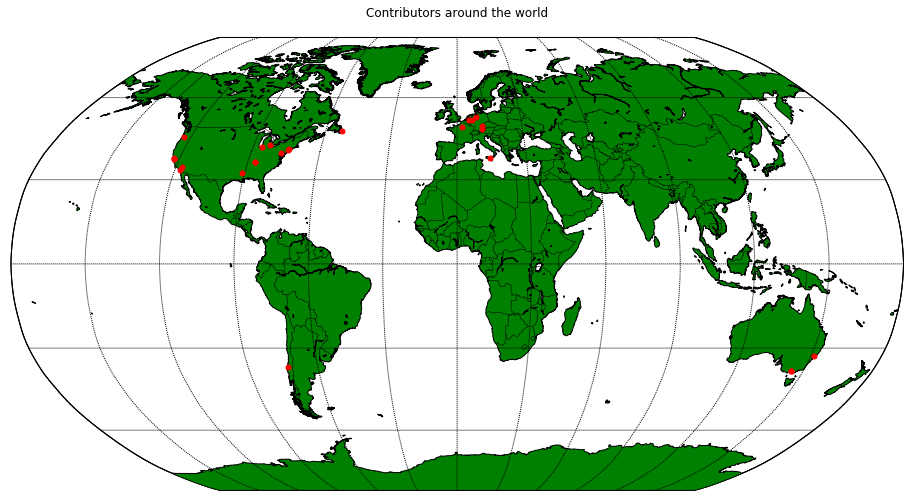

In [6]:
# Make this plot larger.
plt.figure(figsize=(16,12))

eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=0)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'green')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
for k in range(NbContrib):
    print k
    x,y = eq_map(Contrib[3][k], Contrib[2][k])
    eq_map.plot(x, y, 'ro', markersize=5)

title_string = "Contributors around the world\n" 
plt.title(title_string)
plt.savefig("map.jpg", bbox_inches='tight')
plt.show()